In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import layers
from kerastuner.tuners import RandomSearch

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.DS_Store', 'heart.csv', 'HDP_heart.ipynb', '.git']


In [3]:
dataset = pd.read_csv("heart.csv")

In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
dataset.shape

(303, 14)

In [6]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1


In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
info = [
                "age", 
                "1: male, 0: female", 
                "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic", 
                "resting blood pressure", 
                " serum cholestoral in mg/dl", 
                "fasting blood sugar > 120 mg/dl",
                "resting electrocardiographic results (values 0,1,2)", 
                " maximum heart rate achieved", 
                "exercise induced angina", 
                "oldpeak = ST depression induced by exercise relative to rest", 
                "the slope of the peak exercise ST segment", 
                "number of major vessels (0-3) colored by flourosopy", 
                "thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"
        ]


for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [11]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [12]:
dataset["target"].unique()

array([1, 0])

In [13]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


1    165
0    138
Name: target, dtype: int64


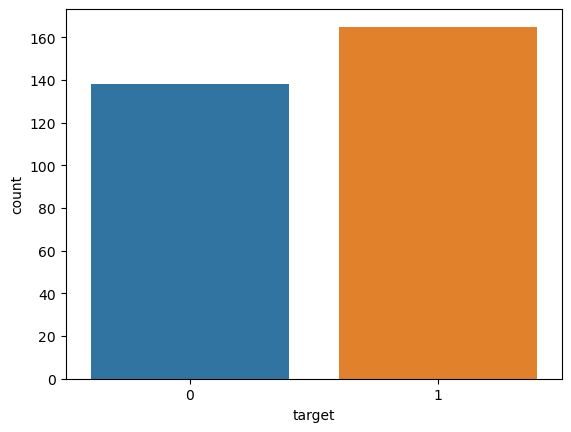

In [14]:
y = dataset["target"]
sns.countplot(x="target", data=dataset)
target_temp = dataset.target.value_counts()
print(target_temp)

In [15]:
print("Percentage of patience without heart problems: " + str(round(target_temp[0]*100/303, 2)))
print("Percentage of patience with heart problems: " + str(round(target_temp[1]*100/303, 2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [16]:
dataset["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='count'>

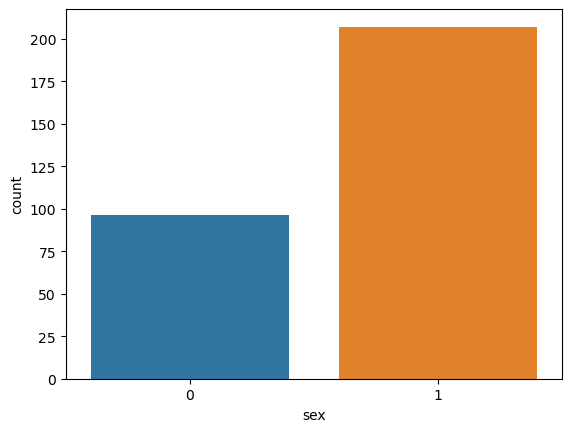

In [17]:
sns.countplot(x="sex", data=dataset)

In [18]:
dataset["cp"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='cp', ylabel='count'>

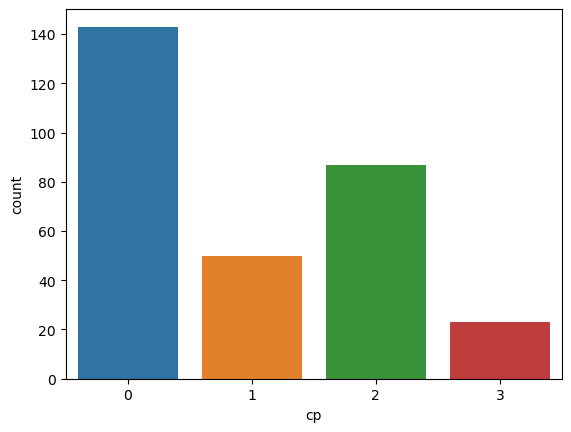

In [19]:
sns.countplot(x="cp", data=dataset)

In [20]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [21]:
dataset["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='count'>

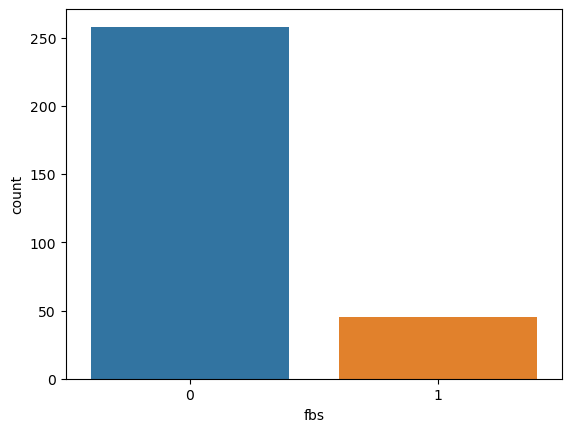

In [22]:
sns.countplot(x="fbs", data=dataset)

In [23]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='count'>

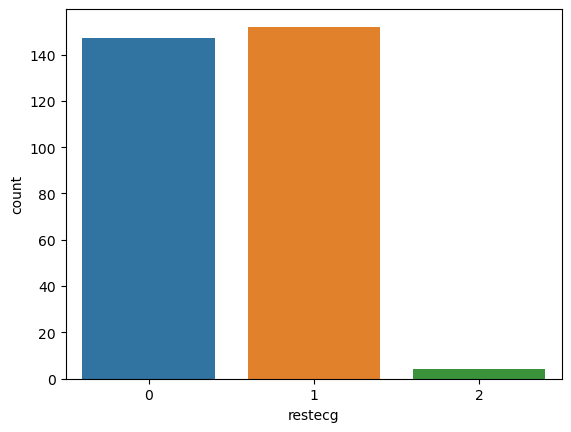

In [24]:
sns.countplot(x="restecg", data=dataset)

In [25]:
dataset["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='count'>

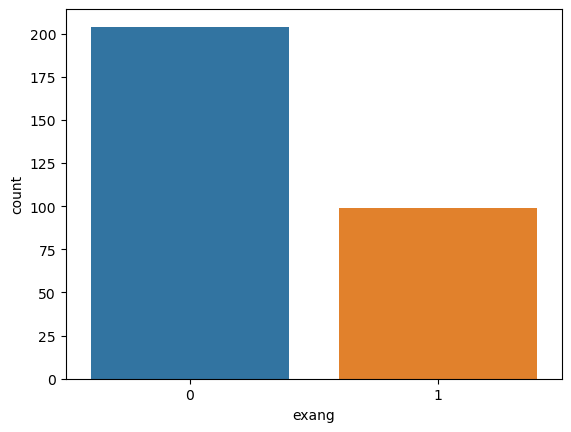

In [26]:
sns.countplot(x="exang", data=dataset)

In [27]:
dataset["slope"].unique()

array([0, 2, 1])

<Axes: xlabel='slope', ylabel='count'>

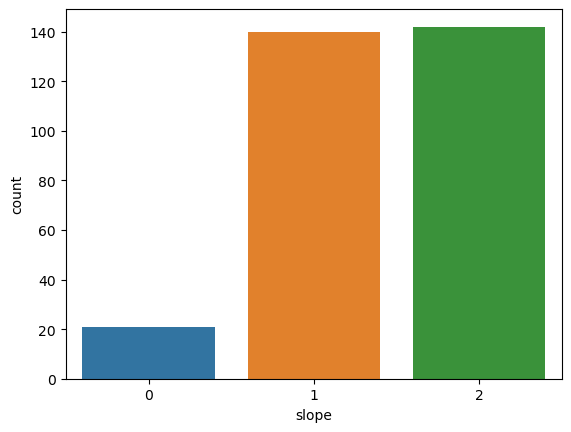

In [28]:
sns.countplot(x="slope", data=dataset)

In [29]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: xlabel='ca', ylabel='count'>

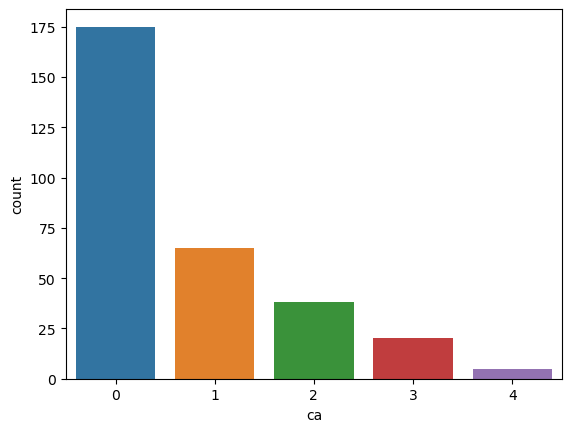

In [30]:
sns.countplot(x="ca", data=dataset)

In [31]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<Axes: xlabel='thal', ylabel='count'>

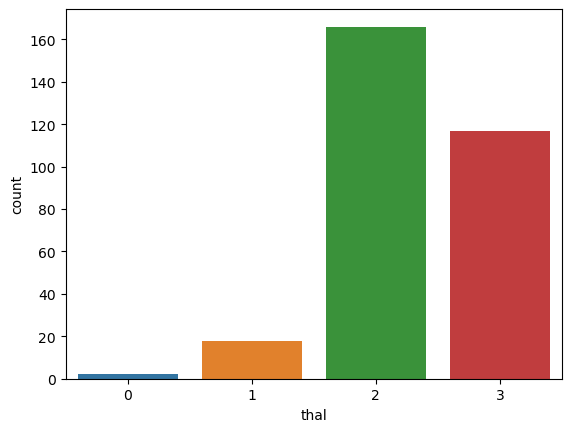

In [32]:
sns.countplot(x="thal", data=dataset)

<Axes: xlabel='thal', ylabel='Density'>

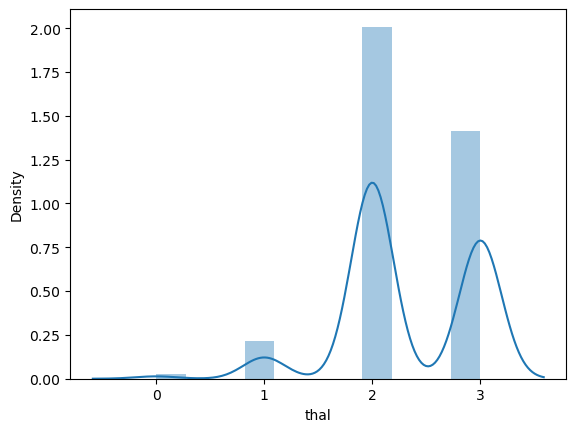

In [33]:
sns.distplot(dataset["thal"])

In [34]:
predictors = dataset.drop("target", axis=1)
target = dataset["target"]

X_train, X_test, Y_train, Y_test = train_test_split(
    predictors, target, test_size=0.20, random_state=0)

In [35]:
X_train.shape

(242, 13)

In [36]:
X_test.shape

(61, 13)

In [37]:
Y_train.shape

(242,)

In [38]:
Y_test.shape

(61,)

### Logistic Regression

In [39]:
lr = LogisticRegression()

lr.fit(X_train, Y_train)

Y_pred_lr = lr.predict(X_test)

In [40]:
Y_pred_lr.shape

(61,)

In [41]:
score_lr = round(accuracy_score(Y_pred_lr, Y_test)*100, 2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [42]:
nb = GaussianNB()

nb.fit(X_train, Y_train)

Y_pred_nb = nb.predict(X_test)

In [43]:
Y_pred_nb.shape

(61,)

In [44]:
score_nb = round(accuracy_score(Y_pred_nb, Y_test)*100, 2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [45]:
sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [46]:
Y_pred_svm.shape

(61,)

In [47]:
score_svm = round(accuracy_score(Y_pred_svm, Y_test)*100, 2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### K Nearest Neighbors

In [48]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)

In [49]:
Y_pred_knn.shape

(61,)

In [50]:
score_knn = round(accuracy_score(Y_pred_knn, Y_test)*100, 2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [51]:
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train, Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt, Y_test)*100, 2)
    if (current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

# print(max_accuracy)
# print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)

In [52]:
print(Y_pred_dt.shape)

(61,)


In [53]:
score_dt = round(accuracy_score(Y_pred_dt, Y_test)*100, 2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [54]:
max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train, Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf, Y_test)*100, 2)
    if (current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

90.16
323


In [55]:
Y_pred_rf.shape

(61,)

In [56]:
score_rf = round(accuracy_score(Y_pred_rf, Y_test)*100, 2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 90.16 %


### XGBoost

In [57]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [58]:
Y_pred_xgb.shape

(61,)

In [59]:
score_xgb = round(accuracy_score(Y_pred_xgb, Y_test)*100, 2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 78.69 %


### Neural Network

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=100, batch_size=16, verbose=0)

Y_pred_tf = model.predict(X_test)
Y_pred_tf = (Y_pred_tf > 0.5)

score_tf = round(accuracy_score(Y_pred_tf, Y_test)*100, 2)

print("The accuracy score achieved using TensorFlow is: " + str(score_tf)+" %")

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-04-20 14:06:26.311647: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 0s 32ms/step
The accuracy score achieved using TensorFlow is: 81.97 %


In [61]:
model.fit(X_train, Y_train, epochs=300)

Epoch 1/300
8/8 [==============================] - 0s 27ms/step - loss: 0.3832 - accuracy: 0.8388
Epoch 2/300
8/8 [==============================] - 0s 10ms/step - loss: 0.3604 - accuracy: 0.8388
Epoch 3/300
8/8 [==============================] - 0s 10ms/step - loss: 0.3350 - accuracy: 0.8636
Epoch 4/300
8/8 [==============================] - 0s 11ms/step - loss: 0.3358 - accuracy: 0.8595
Epoch 5/300
8/8 [==============================] - 0s 9ms/step - loss: 0.3321 - accuracy: 0.8719
Epoch 6/300
8/8 [==============================] - 0s 10ms/step - loss: 0.3257 - accuracy: 0.8554
Epoch 7/300
8/8 [==============================] - 0s 9ms/step - loss: 0.3197 - accuracy: 0.8719
Epoch 8/300
8/8 [==============================] - 0s 10ms/step - loss: 0.3201 - accuracy: 0.8471
Epoch 9/300
8/8 [==============================] - 0s 10ms/step - loss: 0.3436 - accuracy: 0.8678
Epoch 10/300
8/8 [==============================] - 0s 10ms/step - loss: 0.3407 - accuracy: 0.8306
Epoch 11/300
8/8 [===

In [62]:
Y_pred_nn = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [63]:
Y_pred_nn.shape

(61, 1)

In [64]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [65]:
score_nn = round(accuracy_score(Y_pred_nn, Y_test)*100, 2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 80.33 %


In [73]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Define the CNN model using the Keras Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D
    (
        filters=64, kernel_size=3, activation='relu', input_shape=(13,1), kernel_regularizer=tf.keras.regularizers.l2(0.01)
    ),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model using the Adam optimizer and binary cross-entropy loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data for the CNN by adding a new dimension for the channel
X_train_cnn = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the CNN model using early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train_cnn, Y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.2, callbacks=[early_stop])

# Test the model
Y_pred_tf = model.predict(X_test_cnn)
Y_pred_tf_binary = np.round(Y_pred_tf).astype(int)
y_test_binary = np.where(Y_test > 0.5, 1, 0)

score_tf = accuracy_score(y_test_binary, Y_pred_tf_binary)
print("The accuracy score achieved using TensorFlow is: " + str(score_tf*100)+"%")

Y_pred_nn = model.predict(X_test_cnn)
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded

score_nn = round(accuracy_score(Y_pred_nn, y_test_binary)*100, 2)
print("The accuracy score achieved using CNN is: "+str(score_nn)+"%")


2/2 [==============================] - 0s 40ms/step
The accuracy score achieved using TensorFlow is: 55.73770491803278%
2/2 [==============================] - 0s 5ms/step
The accuracy score achieved using CNN is: 55.74%


## VI. Output final score

In [92]:
scores = [score_lr, score_nb, score_svm, score_knn,
          score_dt, score_rf, score_xgb, score_nn]
algorithms = [
    "Logistic Regression", 
    "Naive Bayes", 
    "Support Vector Machine",
    "K-Nearest Neighbors", 
    "Decision Tree", 
    "Random Forest", 
    "XGBoost", 
    "CNN"
]

for i in range(len(algorithms)):
    print("The accuracy score achieved using " + algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 78.69 %
The accuracy score achieved using CNN is: 55.74 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

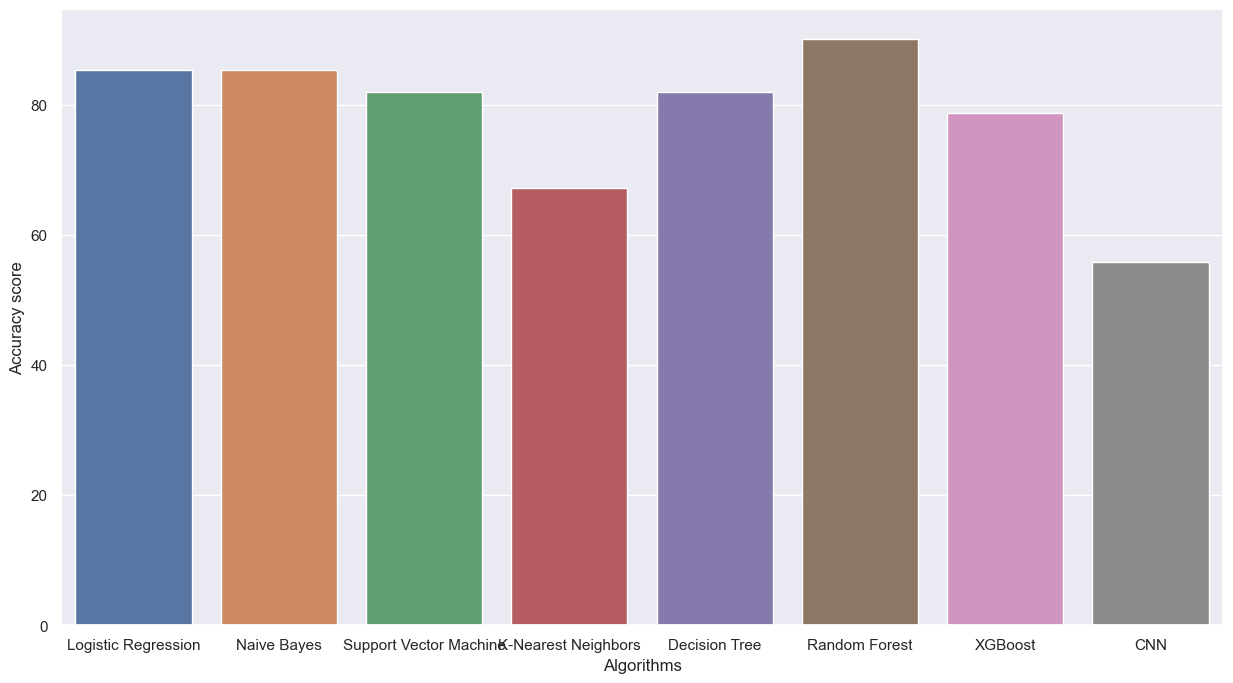

In [93]:
sns.set(rc={'figure.figsize': (15, 8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores)